NameError: name 'zi' is not defined

Wavelenght calculated from Fenton: 84.7933239835
Wavelenght calculated from linear dispersion: 82.0815563869


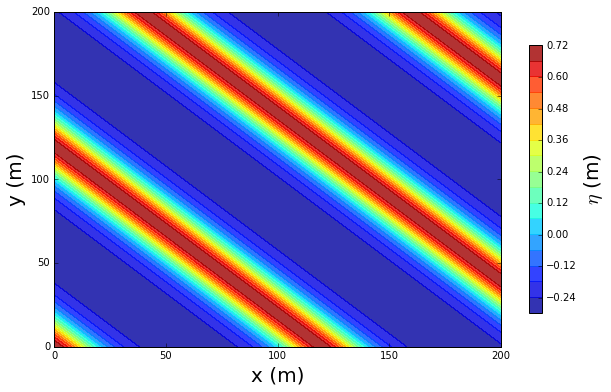

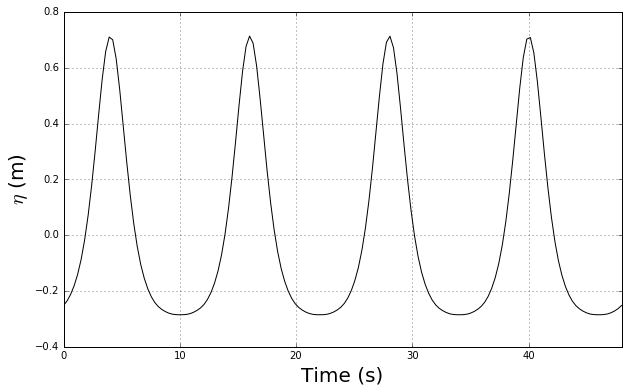

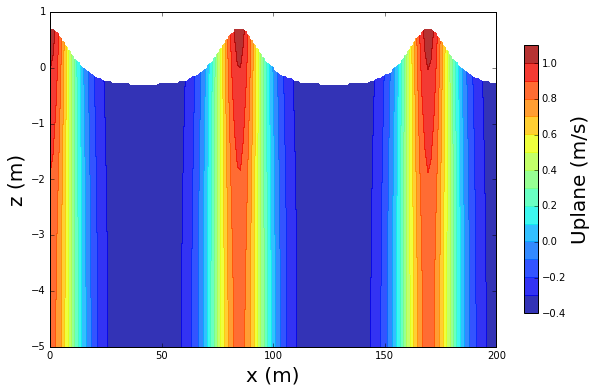

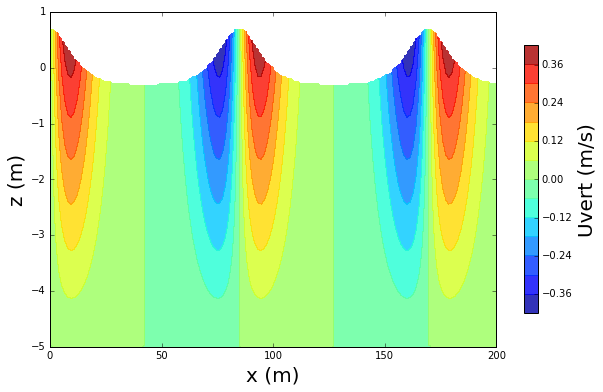

In [10]:
%matplotlib inline
%tb
from matplotlib import pyplot as plt
import numpy as np
import sys
#Append path of local proteus installation
sys.path.append("C:/Users/present/Desktop/proteus/")
#The notebook will work with the following commit:
#https://github.com/erdc-cm/proteus/commit/9bb34b3563b5ddab6cb1dd9f75173da2710d2a41
from proteus import Profiling,SpatialTools
import imp
WT = imp.load_source('WaveTools', 'WaveTools.pyx')



#Setting up wave properties
waveType ="Fenton" #http://johndfenton.com/Papers/Fenton88-The-numerical-solution-of-steady-water-wave-problems.pdf
period = 12.
waveHeight = 1.
mwl = 0.
depth = 5.
g = np.array([0., 0., -9.81])
waveDir = np.array([2., 2., 0.])
norm = WT.setDirVector(waveDir)
normVert = WT.setVertDir(g)

meanVelocity = np.array([0., 0., 0.])
phi0 = 0.


#Calculating wavelength
#To calculate these coefficients use http://johndfenton.com/Steady-waves/Fourier.html

Fenton_kH = 0.0741
Ycoeff = np.array([3.13E-02,1.39E-02,5.05E-03,1.73E-03,5.88E-04,2.05E-04,8.01E-05,5.09E-05])
Bcoeff = np.array([5.18E-02,1.17E-02,2.80E-03,6.56E-04,1.43E-04,2.74E-05,3.98E-06,2.63E-07])
ki =Fenton_kH /waveHeight
wavelength = 2*np.pi/ki


#Checking how wavelength compares with dispersion
#Checking how wavelenght compares with dispersion
print "Wavelenght calculated from Fenton:",wavelength
wdisp = 2*np.pi/WT.dispersion(2*np.pi/period,depth)
print "Wavelenght calculated from linear dispersion:",wdisp





#Calling the class
FW = WT.MonochromaticWaves(period,
                        waveHeight,
                        mwl,
                        depth,
                        g,
                        waveDir,
                        wavelength,
                        waveType,
                        Ycoeff,
                        Bcoeff,
                        meanVelocity,
                        phi0
                        )


#Setting up the plan view area and the depth domain
n=151
xi = np.linspace(0, 200, n)
yi = np.linspace(0, 200, n)
zi = np.linspace(mwl-depth, mwl+waveHeight, n)


#Calculating the free surface elevation calculated from MWL using a 2D plane
eta_t = np.zeros((n, n),)
for i in range(len(xi)):
    for j in range(len(yi)):
        x = [xi[i], yi[j], 0]
        eta_t[i,j] = FW.eta(x, 0.)

psize = 20
        
#Plotting the contour        
plt.figure(1, figsize=(10, 6), dpi=100)
X,Y = np.meshgrid(xi,yi)
CS = plt.contourf(Y,X,eta_t, 16, alpha=0.8)
plt.xlabel("x (m)", size=psize)
plt.ylabel("y (m)", size=psize)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("$\eta$ (m)", size = psize)
plt.show()



#Setting up a time interval of n periods (using npoints sampling points per period)
nperiod = 4
npoints = 40
n = npoints * nperiod
tnlist=np.linspace(0,nperiod*period,n)
eta_t = np.zeros(len(tnlist),)

#Calculating time series
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_t[i] = FW.eta(x, t)


#Plotting time series
plt.figure(2, figsize=(10,6), dpi=100)
plt.xlim(0., nperiod*period)
plt.plot(tnlist, eta_t, "k-")
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.grid()
plt.show()

#Calculating velocity contours
ur  = np.zeros((len(xi),len(zi)),)
uv  = np.zeros((len(xi),len(zi)),)
for i in range(len(xi)):
    for ii in range(len(zi)):
        x = xi[i]*norm + [0,0,zi[ii]]
        ur[i,ii] = sum(FW.u(x, 0.)[:]*norm[:])
        uv[i,ii] = sum(FW.u(x, 0.)[:]*normVert[:])  
        if zi[ii]>  FW.eta(x,0.):
            ur[i,ii] = np.nan
            uv[i,ii] = np.nan
    
#Plotting velocity contours
plt.figure(3,figsize=(10, 6), dpi=100)
X,Y = np.meshgrid(zi,yi)
CS = plt.contourf(Y,X,ur, 16, alpha=0.8, cmap='jet')
plt.xlabel("x (m)", size=psize)
plt.ylabel("z (m)", size=psize)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("Uplane (m/s)", size = psize)
plt.show()

plt.figure(4,figsize=(10, 6), dpi=100)
X,Y = np.meshgrid(zi,yi)
CS = plt.contourf(Y,X,uv, 16, alpha=0.8, cmap='jet')
plt.xlabel("x (m)", size=psize)
plt.ylabel("z (m)", size=psize)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("Uvert (m/s)", size = psize)
plt.show()

NameError: name 'zi' is not defined

Wavelenght calculated from Fenton: 84.7933239835
Wavelenght calculated from linear dispersion: 82.0815563869


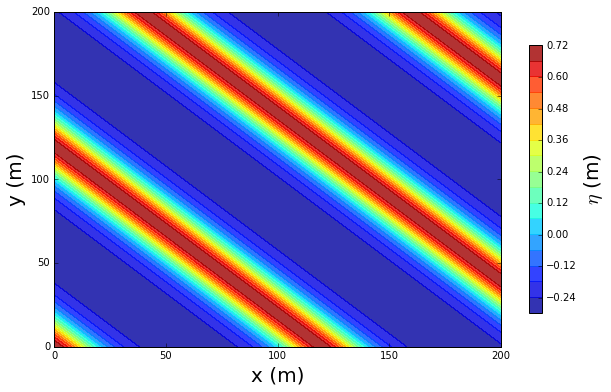

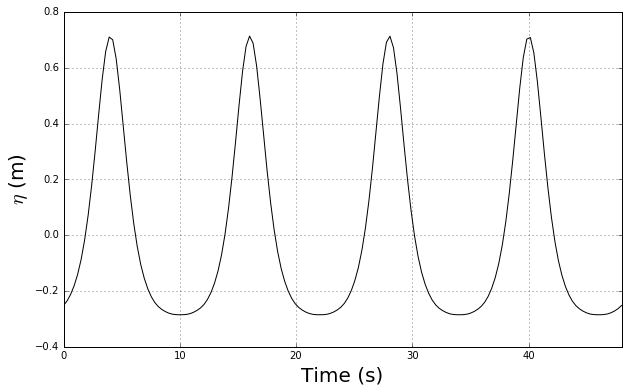

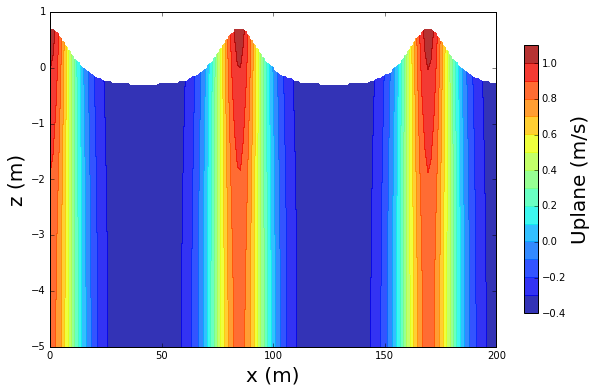

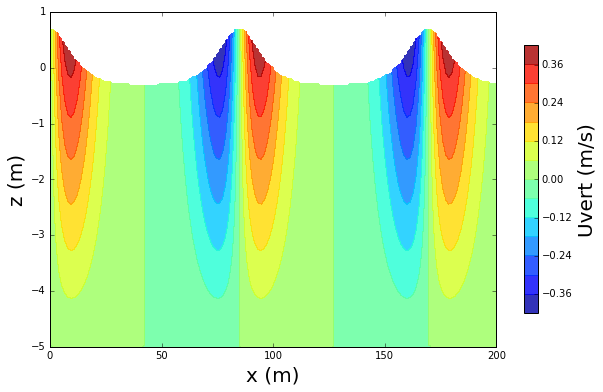

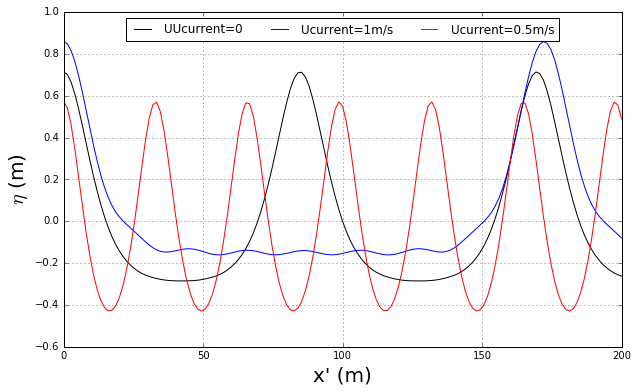

In [9]:
#Following current
#To calculate these coefficients use http://johndfenton.com/Steady-waves/Fourier.html
meanVelocity = norm

Fenton_kH = 0.0365
Ycoeff = np.array([9.95E-03,7.65E-03,5.24E-03,3.35E-03,2.10E-03,1.34E-03,9.44E-04,7.85E-04])
Bcoeff = np.array([2.29E-02,8.85E-03,4.07E-03,1.95E-03,9.64E-04,4.97E-04,2.84E-04,1.00E-04])

ki =Fenton_kH /waveHeight
wavelength = 2*np.pi/ki


FWfoll = WT.MonochromaticWaves(period,
                        waveHeight,
                        mwl,
                        depth,
                        g,
                        waveDir,
                        wavelength,
                        waveType,
                        Ycoeff,
                        Bcoeff,
                        meanVelocity,
                        phi0
                        )
#Following current
#To calculate these coefficients use http://johndfenton.com/Steady-waves/Fourier.html
meanVelocity = -0.5*norm


Fenton_kH = 0.1907
Ycoeff = np.array([9.34E-02,1.32E-02,1.92E-03,3.14E-04,5.66E-05,1.09E-05,2.27E-06,8.97E-07])
Bcoeff = np.array([1.08E-01,6.53E-03,2.18E-04,-8.25E-06,-1.27E-06,-2.22E-09,9.51E-09,5.73E-10])

ki =Fenton_kH /waveHeight
wavelength = 2*np.pi/ki

FWopp = WT.MonochromaticWaves(period,
                        waveHeight,
                        mwl,
                        depth,
                        g,
                        waveDir,
                        wavelength,
                        waveType,
                        Ycoeff,
                        Bcoeff,
                        meanVelocity,
                        phi0
                        )

#Calculating velocity contours
norm = WT.setDirVector(waveDir)
eta_t  = np.zeros((len(xi),3,))
for i in range(len(xi)):
    x = xi[i]*norm
    eta_t[i,0] = FW.eta(x,0.)
    eta_t[i,1] = FWfoll.eta(x,0.)    
    eta_t[i,2] = FWopp.eta(x,0.)      

#Plotting time series
plt.figure(2, figsize=(10,6), dpi=100)
plt.plot( xi, eta_t[:,0], color="black",label="UUcurrent=0")
plt.plot( xi, eta_t[:,1], color="blue",label="Ucurrent=1m/s")
plt.plot( xi, eta_t[:,2], color="red",label="Ucurrent=0.5m/s")
plt.legend(loc="upper center",ncol=3)
plt.xlabel("x (m)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.grid()
plt.show()